**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**LOAD THE DATASET**

In [114]:
df = pd.read_csv("5G_energy_consumption_dataset.csv")
df

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
92624,20230102 170000,B_1018,14.648729,0.087538,0.0,7.325859
92625,20230102 180000,B_1018,14.648729,0.082635,0.0,7.325859
92626,20230102 210000,B_1018,13.452915,0.055538,0.0,7.325859
92627,20230102 220000,B_1018,13.602392,0.058077,0.0,7.325859


**DATA EXPLORATION**

In [115]:
df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [117]:
df.isnull().sum()

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64

In [118]:
df.duplicated().sum()

0

**PROFILE REPORT**

In [13]:
profile = ProfileReport(df, title='5G Energy Consumption Dataset Report', explorative=True)
profile.to_file("5G_Energy_Consumption_Report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**HANDLE OUTLIERS**

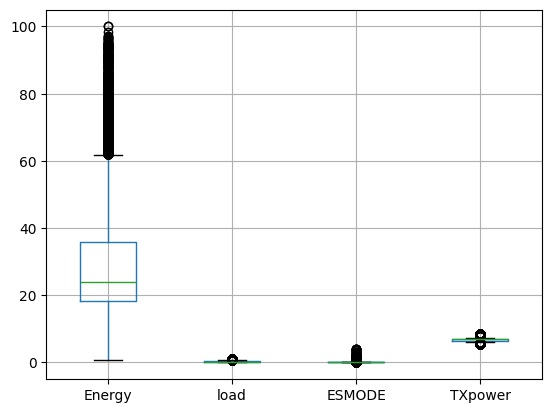

In [119]:
df.boxplot()
plt.show()

In [120]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

In [121]:
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df[numerical_features] = qt.fit_transform(df[numerical_features])


In [122]:
df[numerical_features].describe()

,Energy,load,ESMODE,TXpower
count,92629.000000,92629.000000,92629.000000,92629.000000
mean,-0.009115,-0.002995,-4.798665,0.006570
std,1.010314,0.999176,1.652575,0.973389
min,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.695908,-0.678442,-5.199338,-0.935852
50%,-0.011291,-0.010051,-5.199338,0.165095
75%,0.668987,0.670536,-5.199338,0.165095
max,5.199338,5.199338,5.199338,5.199338


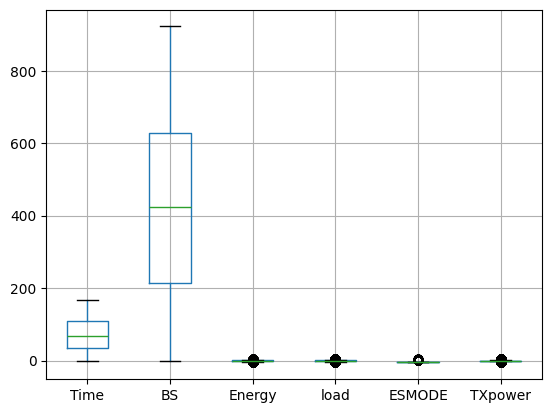

In [77]:
df.boxplot()
plt.show()

In [123]:
df

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,2.131682,0.984102,-5.199338,1.837975
1,20230101 020000,B_0,1.654145,0.615828,-5.199338,1.837975
2,20230101 030000,B_0,1.756055,0.114300,-5.199338,1.837975
3,20230101 040000,B_0,1.606755,0.226131,-5.199338,1.837975
4,20230101 050000,B_0,1.664082,0.033826,-5.199338,1.837975
...,...,...,...,...,...,...
92624,20230102 170000,B_1018,-1.169401,-0.428901,-5.199338,2.273052
92625,20230102 180000,B_1018,-1.169401,-0.458800,-5.199338,2.273052
92626,20230102 210000,B_1018,-1.312981,-0.698381,-5.199338,2.273052
92627,20230102 220000,B_1018,-1.278137,-0.669031,-5.199338,2.273052


In [124]:
df.select_dtypes(include=['object'])

,Time,BS
0,20230101 010000,B_0
1,20230101 020000,B_0
2,20230101 030000,B_0
3,20230101 040000,B_0
4,20230101 050000,B_0
...,...,...
92624,20230102 170000,B_1018
92625,20230102 180000,B_1018
92626,20230102 210000,B_1018
92627,20230102 220000,B_1018


In [125]:
le = LabelEncoder()
df["Time"] = le.fit_transform(df["Time"])
df["BS"] = le.fit_transform(df["BS"])

In [126]:
df

,Time,BS,Energy,load,ESMODE,TXpower
0,0,0,2.131682,0.984102,-5.199338,1.837975
1,1,0,1.654145,0.615828,-5.199338,1.837975
2,2,0,1.756055,0.114300,-5.199338,1.837975
3,3,0,1.606755,0.226131,-5.199338,1.837975
4,4,0,1.664082,0.033826,-5.199338,1.837975
...,...,...,...,...,...,...
92624,40,10,-1.169401,-0.428901,-5.199338,2.273052
92625,41,10,-1.169401,-0.458800,-5.199338,2.273052
92626,44,10,-1.312981,-0.698381,-5.199338,2.273052
92627,45,10,-1.278137,-0.669031,-5.199338,2.273052


In [127]:
df.corr()

,Time,BS,Energy,load,ESMODE,TXpower
Time,1.000000,-0.026612,0.038929,0.063080,-0.025334,-0.037920
BS,-0.026612,1.000000,-0.024527,-0.029532,0.002279,0.092952
Energy,0.038929,-0.024527,1.000000,0.697268,-0.391960,0.469892
load,0.063080,-0.029532,0.697268,1.000000,-0.386502,0.186580
ESMODE,-0.025334,0.002279,-0.391960,-0.386502,1.000000,0.035975
TXpower,-0.037920,0.092952,0.469892,0.186580,0.035975,1.000000


<Axes: >

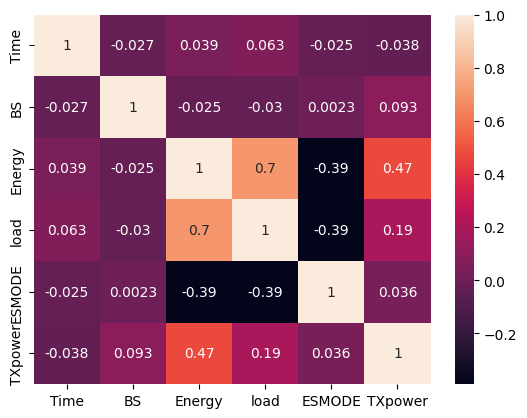

In [61]:
sns.heatmap(df.corr(), annot= True)

In [128]:
X = df.drop(columns=['Energy'])
y = df['Energy']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [132]:
y_pred = model.predict(X_test)
y_pred

array([ 1.32753771, -0.4662097 , -1.17379273, ...,  1.1233581 ,
        0.27946695,  0.45997111])

In [134]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.15504834210386687
MSE: 0.06301009382219969
R² Score: 0.9373976734912048
